In [17]:
# --- Import Important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
our_data = pd.read_csv("Ebbinghaus_dataset.csv") # --- Read data

## Understanding our data

In [3]:
our_data.shape  # --- check total rows and columns

(10000, 9)

In [4]:
our_data.sample(5)  # --- how our data looks alike

,Time (days),Strength of Memory,Learning Method,Material Complexity,Information Relevance,Presentation Type,Sleep Quality,Stress Level,Memory Retention (%)
3540,1.552498,2.610565,Watching,Low,Low,Visual,Poor,Low,52.855050
7707,5.358026,0.569750,Listening,Low,High,Visual,Good,Moderate,1.718484
1762,0.776770,3.043800,Doing,Medium,Low,Auditory,Good,Moderate,81.595929
1170,4.356796,4.294996,Doing,Low,Medium,Visual,Good,High,38.818928
5066,3.375906,0.630680,Watching,Medium,High,Auditory,Average,Low,0.000000


In [5]:
our_data.info(memory_usage="deep") # --- Understanding our data & memory use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (days)            10000 non-null  float64
 1   Strength of Memory     10000 non-null  float64
 2   Learning Method        10000 non-null  object 
 3   Material Complexity    10000 non-null  object 
 4   Information Relevance  10000 non-null  object 
 5   Presentation Type      10000 non-null  object 
 6   Sleep Quality          10000 non-null  object 
 7   Stress Level           10000 non-null  object 
 8   Memory Retention (%)   10000 non-null  float64
dtypes: float64(3), object(6)
memory usage: 3.3 MB


In [6]:
our_data.isnull().sum() # --- check null value

Time (days)              0
Strength of Memory       0
Learning Method          0
Material Complexity      0
Information Relevance    0
Presentation Type        0
Sleep Quality            0
Stress Level             0
Memory Retention (%)     0
dtype: int64

In [8]:
our_data.duplicated().sum()  # --- check duplicate value

0

In [7]:
our_data.describe()  # --- Understand our data mathematically

,Time (days),Strength of Memory,Memory Retention (%)
count,10000.000000,10000.000000,10000.000000
mean,3.509701,2.770384,38.401540
std,1.984648,1.301825,27.111362
min,0.100080,0.500710,0.000000
25%,1.799669,1.642756,15.990377
50%,3.498447,2.776535,33.149857
75%,5.206044,3.904156,57.077783
max,6.998052,4.999662,100.000000


## Data Preprocessing

In [10]:
our_data.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in our_data.columns]

In [11]:
our_data.head()

,time_days,strength_of_memory,learning_method,material_complexity,information_relevance,presentation_type,sleep_quality,stress_level,memory_retention_%
0,2.684327,2.181384,Watching,Medium,Medium,Visual,Poor,High,27.858304
1,6.659929,1.998104,Watching,Medium,Medium,Textual,Poor,High,0.000000
2,5.150758,1.292693,Doing,Low,Low,Visual,Good,High,1.857434
3,4.230744,3.232700,Listening,High,High,Textual,Poor,Low,27.431739
4,1.176529,2.644809,Listening,High,Low,Auditory,Average,Moderate,63.434669


In [13]:
%matplotlib inline ## --- to view the graph in the same page

UsageError: unrecognized arguments: ## --- to view the graph in the same page


In [14]:
# Recalculate Ebbinghaus theoretical retention for comparison plot
our_data['ebbinghaus_retention'] = np.exp(-our_data['time_days'] / our_data['strength_of_memory']) * 100  # --- This converts the retention into percent (%) by multiplying by 100.

In [15]:
our_data.sample(5)

,time_days,strength_of_memory,learning_method,material_complexity,information_relevance,presentation_type,sleep_quality,stress_level,memory_retention_%,ebbinghaus_retention
2741,1.655131,3.122247,Listening,High,High,Visual,Good,Low,63.396242,58.854087
6877,1.418629,2.446767,Listening,Medium,Low,Textual,Poor,Low,60.355848,56.001192
4157,5.972940,3.230741,Watching,High,High,Visual,Poor,Moderate,16.450549,15.742863
8161,0.973926,3.792830,Listening,Medium,Medium,Textual,Poor,High,79.823525,77.353783
3795,4.645152,4.334628,Doing,Medium,Low,Textual,Poor,High,46.391747,34.244716


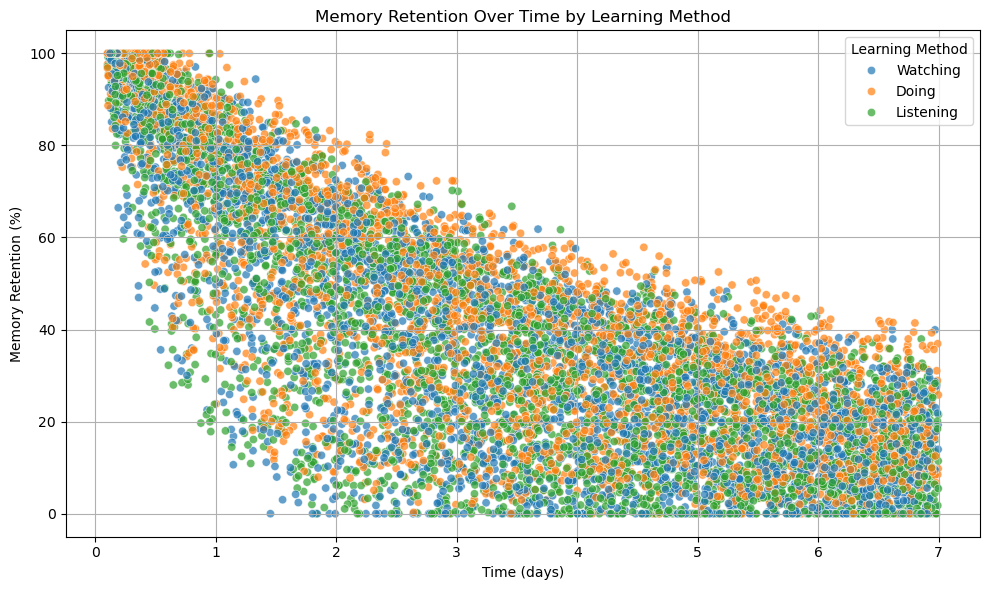

In [16]:
# --- Memory Retention Over Time by Learning Method
plt.figure(figsize=(10, 6))
sns.scatterplot(data=our_data, x='time_days', y='memory_retention_%', hue='learning_method', alpha=0.7)
plt.title("Memory Retention Over Time by Learning Method")
plt.xlabel("Time (days)")
plt.ylabel("Memory Retention (%)")
plt.legend(title="Learning Method")
plt.grid(True)
plt.tight_layout()
plt.show()

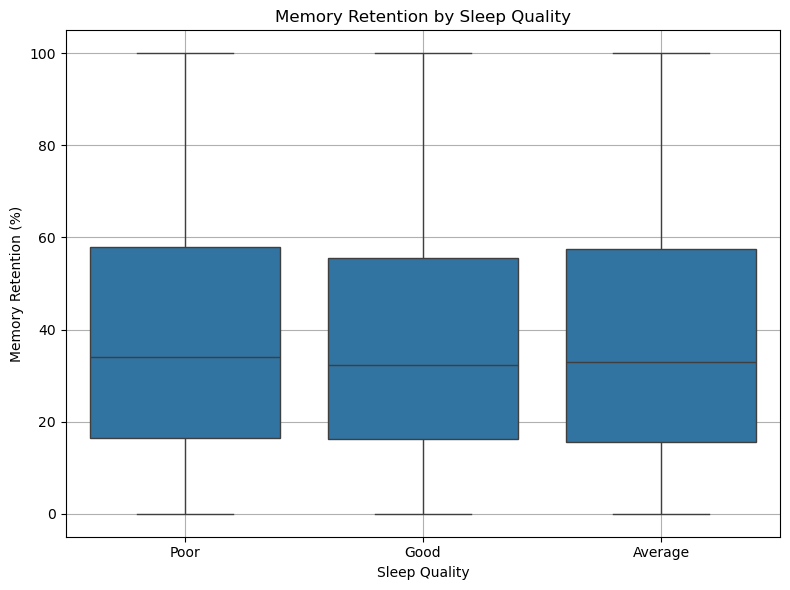

In [18]:
# --- Memory Retention by Sleep Quality (check any outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(data = our_data, x='sleep_quality', y='memory_retention_%')
plt.title("Memory Retention by Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Memory Retention (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

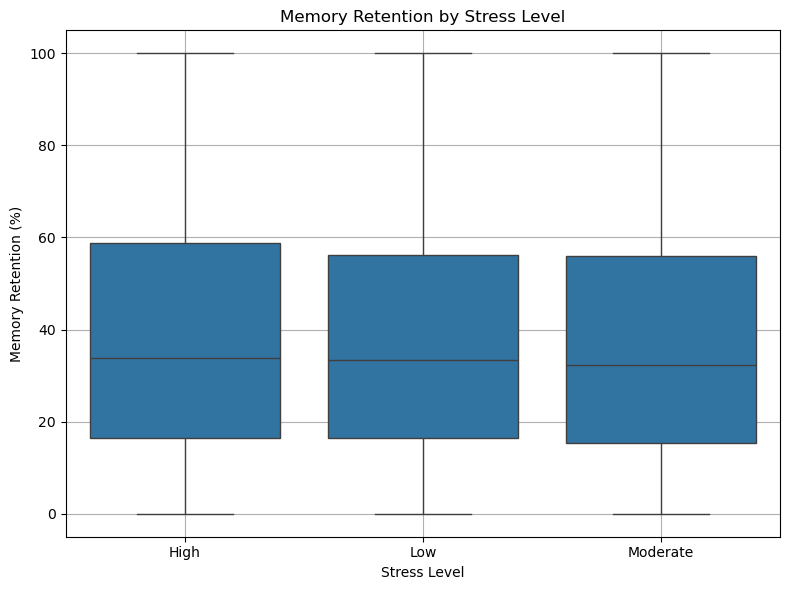

In [19]:
# --- Memory Retention by Stress Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=our_data, x='stress_level', y='memory_retention_%')
plt.title("Memory Retention by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Memory Retention (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

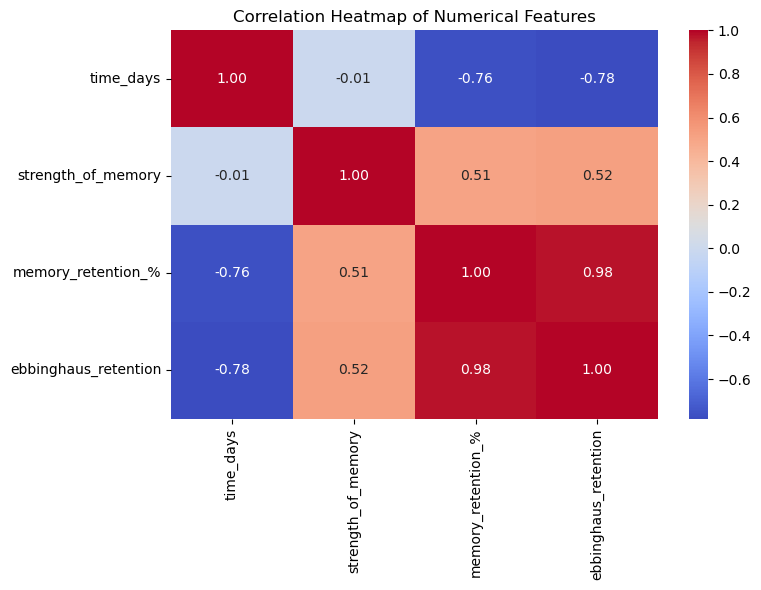

In [20]:
# --- Correlation Heatmap of Numerical Features
numeric_cols = our_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

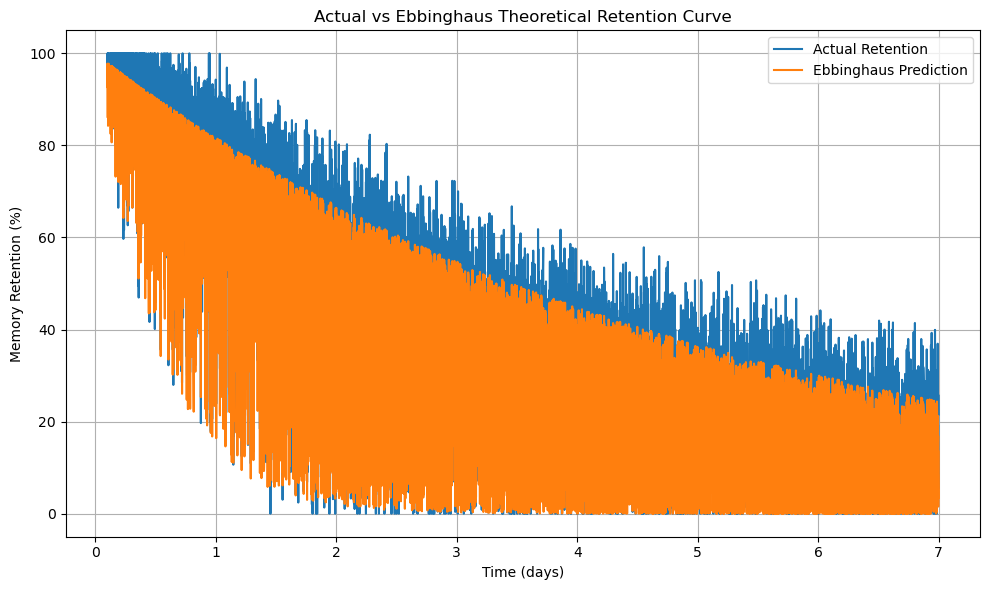

In [21]:
# --- Actual vs Ebbinghaus Theoretical Retention
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_days', y='memory_retention_%', data=our_data.sort_values('time_days'), label='Actual Retention')
sns.lineplot(x='time_days', y='ebbinghaus_retention', data=our_data.sort_values('time_days'), label='Ebbinghaus Prediction')
plt.title("Actual vs Ebbinghaus Theoretical Retention Curve")
plt.xlabel("Time (days)")
plt.ylabel("Memory Retention (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

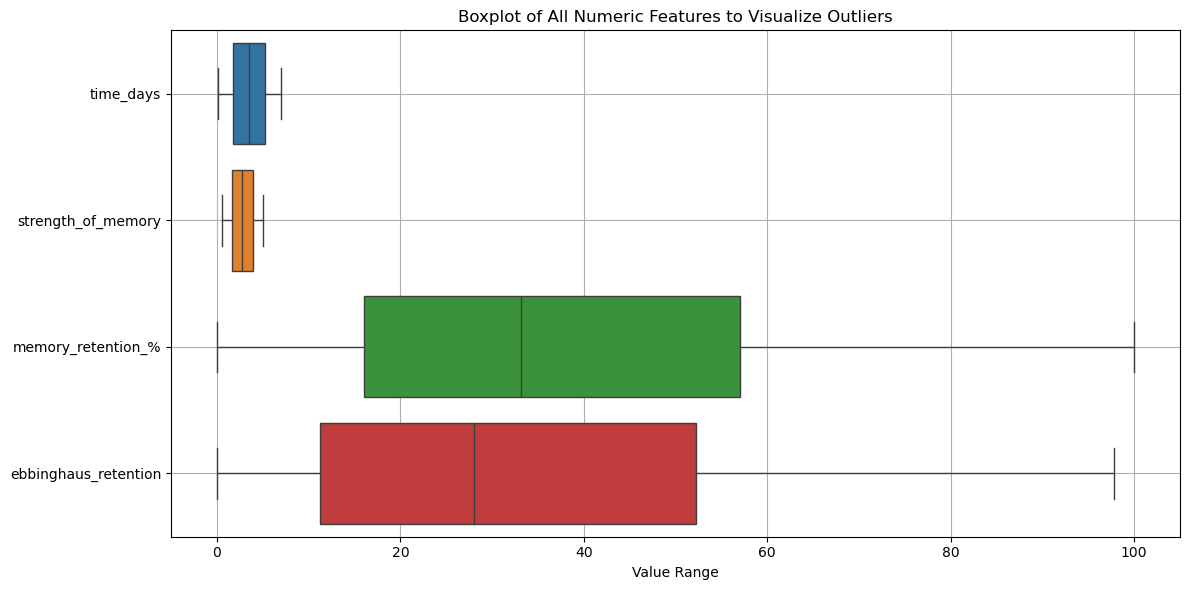

In [22]:
# --- Boxplot for all numerical data
numeric_cols = our_data.select_dtypes(include=['float64'])


plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols, orient='h')
plt.title("Boxplot of All Numeric Features to Visualize Outliers")
plt.xlabel("Value Range")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
our_data['learning_method'].unique()

array(['Watching', 'Doing', 'Listening'], dtype=object)

In [24]:
our_data['learning_method'].nunique()

3

In [25]:
our_data.shape 

(10000, 10)

In [27]:
X = our_data.drop(columns=['memory_retention_%', 'ebbinghaus_retention']) 
y = our_data['memory_retention_%']

In [28]:
X.shape,y.shape

((10000, 8), (10000,))

In [29]:
our_data.shape

(10000, 10)

In [30]:
# from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [32]:
X_train.head()

,time_days,strength_of_memory,learning_method,material_complexity,information_relevance,presentation_type,sleep_quality,stress_level
9254,5.418620,1.160935,Listening,High,Low,Auditory,Average,Moderate
1561,1.734407,1.641636,Watching,High,High,Auditory,Poor,Low
1670,2.726301,2.015176,Doing,High,Medium,Visual,Poor,Moderate
6087,1.521318,4.419564,Watching,Low,Medium,Visual,Average,Moderate
6669,0.999194,2.068460,Listening,High,High,Auditory,Poor,Low


In [33]:
X_train['material_complexity'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [34]:
X_train['information_relevance'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [35]:
X_train['sleep_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [36]:
X_train['stress_level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [37]:
X_train['presentation_type'].unique()

array(['Auditory', 'Visual', 'Textual'], dtype=object)

In [36]:
X_train['learning_method'].unique()

array(['Listening', 'Watching', 'Doing'], dtype=object)

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MultiLabelBinarizer

In [39]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

trf1 = ColumnTransformer([
    ('ohe_learning_method',OneHotEncoder(sparse_output = False,handle_unknown='ignore'),[2]),
    ('ohe_presentation_type',OneHotEncoder(sparse_output = False,handle_unknown='ignore'),[5]),
    ('ordinal_material_complexity', OrdinalEncoder(categories = [['Low', 'Medium', 'High']]),[3]),
    ('ordinal_information_relevance',OrdinalEncoder(categories = [['Low', 'Medium', 'High']]),[4]),
    ('ordinal_sleep_quality',OrdinalEncoder(categories = [['Poor', 'Average', 'Good']]),[6]),
    ('ordinal_stress_level',OrdinalEncoder(categories = [['Low', 'Moderate', 'High']]),[7])
],remainder='passthrough')



In [40]:
trf2 = ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,None))
],remainder='passthrough')

In [41]:
trf4 = XGBRegressor(n_estimators=100, objective='reg:squarederror')

In [42]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf4',trf4)
])   

In [43]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_learning_method',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2]),
                                                 ('ohe_presentation_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5]),
                                                 ('ordinal_material_complexity',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  [3]),
                                                 ('ord...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Predict on test data
y_pred = pipe.predict(X_test)

# Step 2: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Print results
print("Model Evaluation on Test Set")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation on Test Set
Mean Squared Error (MSE): 30.7362
Root Mean Squared Error (RMSE): 5.5440
Mean Absolute Error (MAE): 4.4689
R-squared (R²): 0.9577


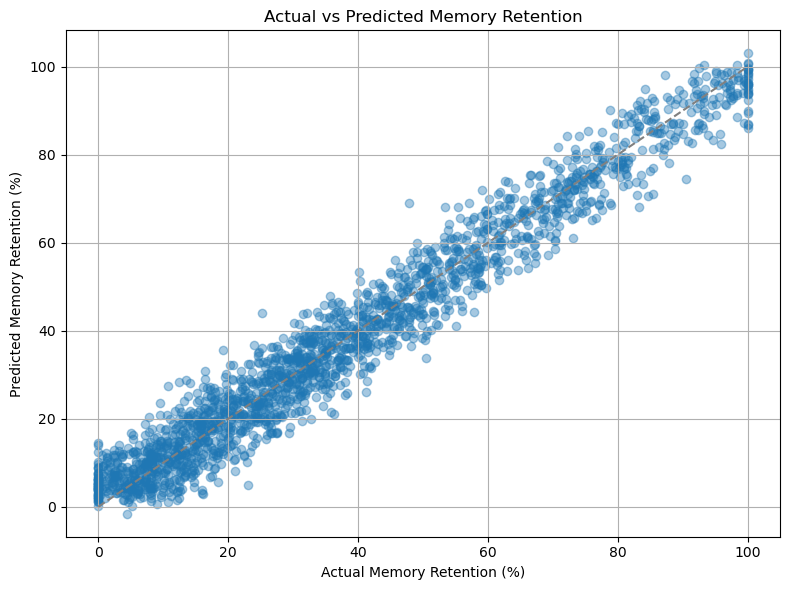

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, 100], [0, 100], '--', color='gray')
plt.xlabel("Actual Memory Retention (%)")
plt.ylabel("Predicted Memory Retention (%)")
plt.title("Actual vs Predicted Memory Retention")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# --- Use neg_mean_squared_error because scikit-learn uses "higher = better"
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# --- Run 5-fold cross-validation
cv_scores = cross_val_score(pipe, X, y, scoring=mse_scorer, cv=10) 

# --- Convert to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

# --- results
print("Cross-Validation Results (10-Fold):")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"Std Dev: {rmse_scores.std():.4f}")

Cross-Validation Results (10-Fold):
RMSE Scores: [5.766467   5.69023348 5.85251763 5.60372563 5.35739868 5.57293694
 5.84306111 5.87670236 5.69672438 5.83811575]
Mean RMSE: 5.7098
Std Dev: 0.1550


In [50]:
# --- Hyperparameter Tuning with GridSearchCV
param_grid = {
    'trf4__n_estimators': [50, 100, 150],
    'trf4__max_depth': [4, 5, 6],
    'trf4__learning_rate': [0.05, 0.075, 0.1],
    'trf4__subsample': [0.8, 0.9, 1.0]
}

In [51]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)  #--- cross validation for 5 fold

In [53]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_learning_method',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [2]),
                                                                        ('ohe_presentation_type',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [5]),
                                                                        ('ordinal_material_complexity',
                                                                         OrdinalEncoder(categories=[['Low',
                                                                                                     '...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'trf4__learning_rate': [0.05, 0.075, 0.1],
                         'trf4__max_depth': [4, 5, 6],
                         'trf4__n_estimators': [50, 100, 150],
                         'trf4__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [55]:
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nFinal Evaluation on Test Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Best Parameters: {'trf4__learning_rate': 0.05, 'trf4__max_depth': 5, 'trf4__n_estimators': 100, 'trf4__subsample': 0.8}
Best RMSE (CV): 5.392659478815578

Final Evaluation on Test Set:
RMSE: 5.1905
MAE: 4.1893
R²: 0.9629


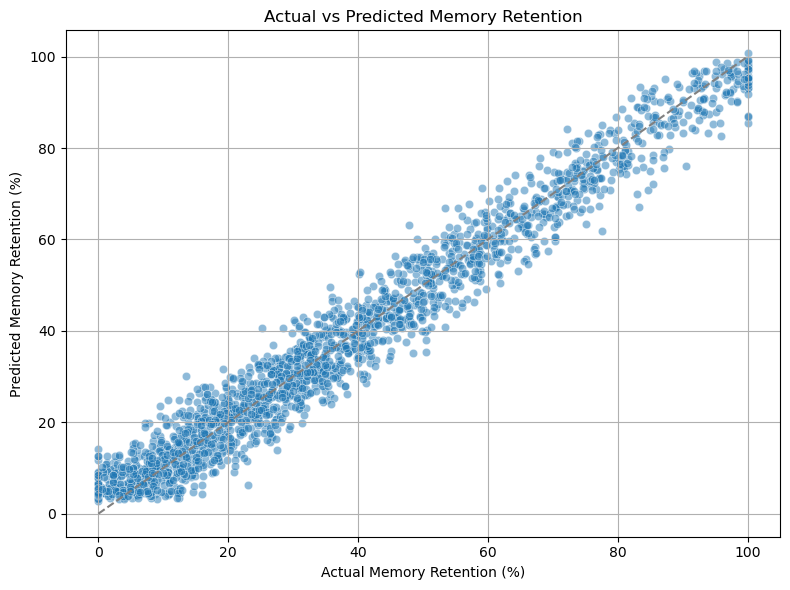

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Predict using GridSearchCV's best model
y_pred = grid_search.predict(X_test)
best_model = grid_search.best_estimator_

# --- Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([0, 100], [0, 100], '--', color='gray')
plt.xlabel("Actual Memory Retention (%)")
plt.ylabel("Predicted Memory Retention (%)")
plt.title("Actual vs Predicted Memory Retention")
plt.grid(True)
plt.tight_layout()
plt.show()

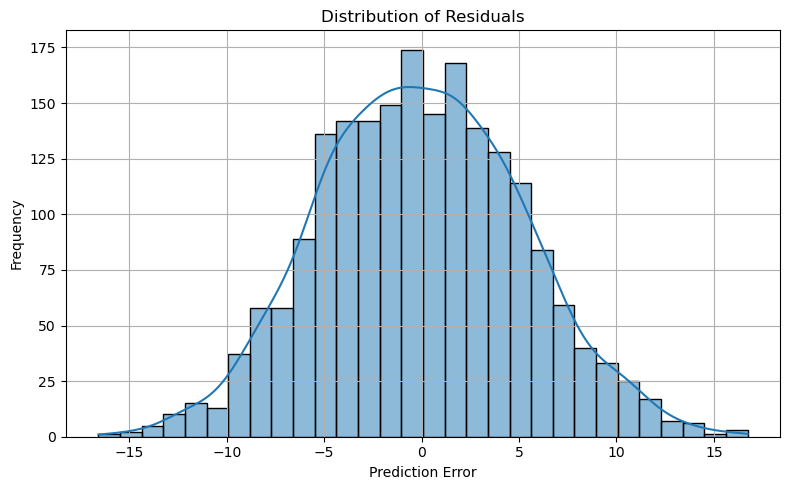

In [57]:
# --- Get Residual Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

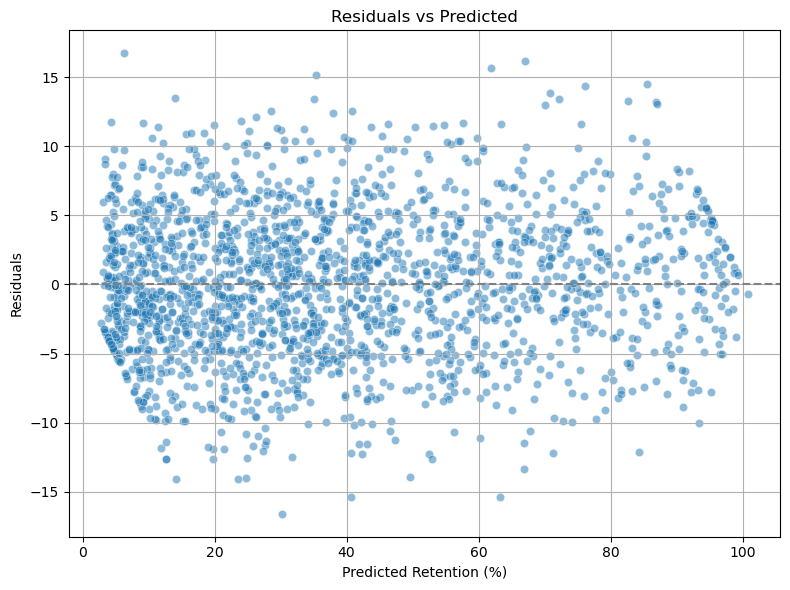

In [58]:
# ---  Residuals vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted Retention (%)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

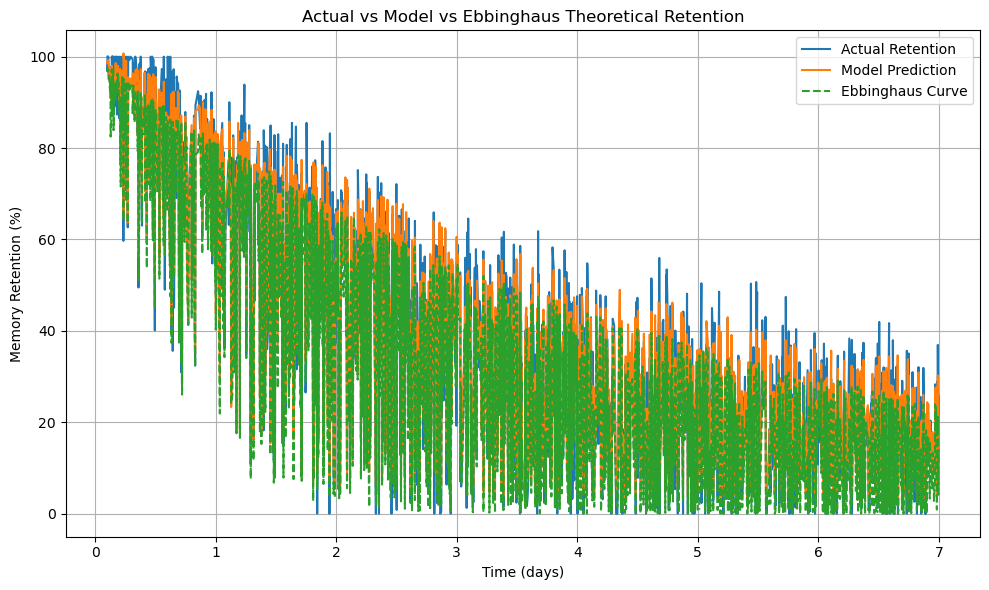

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Predict using the best model
y_pred = grid_search.predict(X_test)

# --- Recreate test set DataFrame
comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = y_pred
comparison_df['Ebbinghaus'] = np.exp(-comparison_df['time_days'] / comparison_df['strength_of_memory']) * 100

# --- Sort by time for line plot clarity
comparison_df_sorted = comparison_df.sort_values('time_days')

# --- plot after combining all the things
plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_df_sorted, x='time_days', y='Actual', label='Actual Retention')
sns.lineplot(data=comparison_df_sorted, x='time_days', y='Predicted', label='Model Prediction')
sns.lineplot(data=comparison_df_sorted, x='time_days', y='Ebbinghaus', label='Ebbinghaus Curve', linestyle='--')

plt.title("Actual vs Model vs Ebbinghaus Theoretical Retention")
plt.xlabel("Time (days)")
plt.ylabel("Memory Retention (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

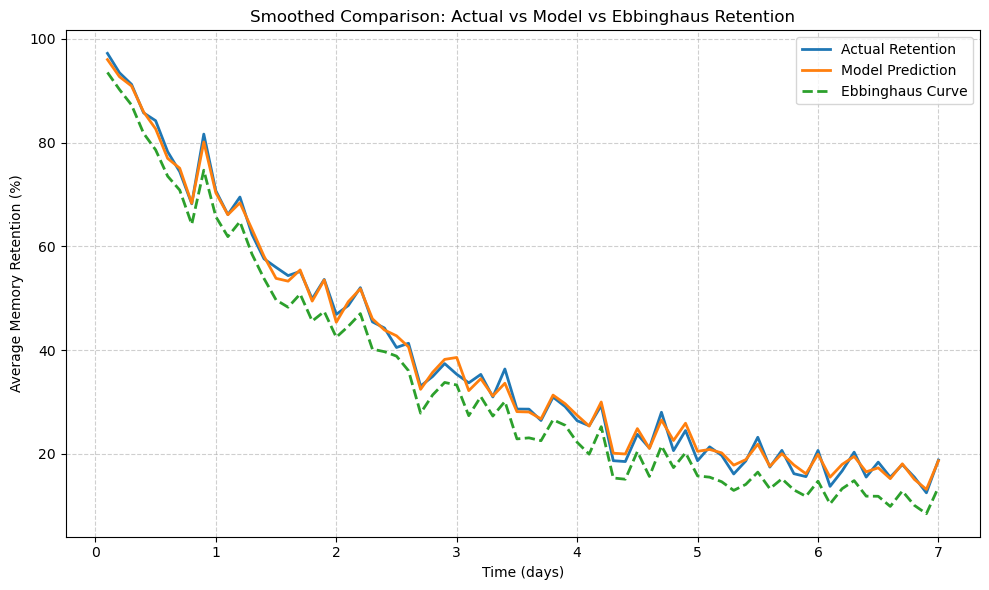

In [60]:
# --- Bin time into small intervals (e.g., every 0.1 day)
comparison_df['time_bin'] = comparison_df['time_days'].round(1)

# --- Group and average each curve
avg_df = comparison_df.groupby('time_bin').agg({
    'Actual': 'mean',
    'Predicted': 'mean',
    'Ebbinghaus': 'mean'
}).reset_index()

# --- plot smoother trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_df, x='time_bin', y='Actual', label='Actual Retention', linewidth=2)
sns.lineplot(data=avg_df, x='time_bin', y='Predicted', label='Model Prediction', linewidth=2)
sns.lineplot(data=avg_df, x='time_bin', y='Ebbinghaus', label='Ebbinghaus Curve', linestyle='--', linewidth=2)

plt.title("Smoothed Comparison: Actual vs Model vs Ebbinghaus Retention")
plt.xlabel("Time (days)")
plt.ylabel("Average Memory Retention (%)")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


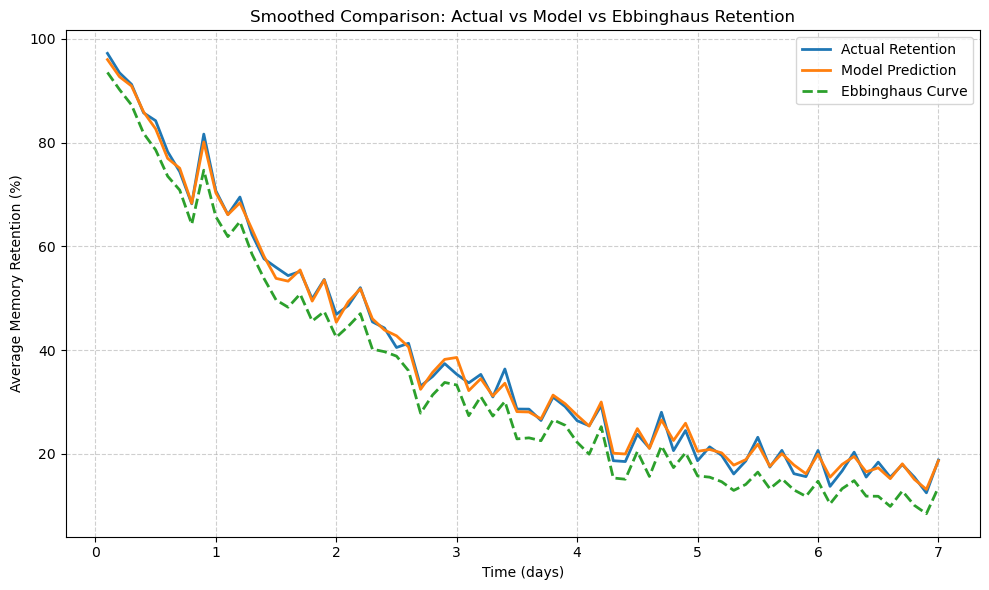


RMSE Comparison Table:
           Model     RMSE
      Your Model 5.190462
Ebbinghaus Curve 7.295721


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# --- Predict
y_pred = grid_search.predict(X_test)

# --- Build DataFrame
comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = y_pred
comparison_df['Ebbinghaus'] = np.exp(-comparison_df['time_days'] / comparison_df['strength_of_memory']) * 100
comparison_df['time_bin'] = comparison_df['time_days'].round(1)

# --- Average by time bin
avg_df = comparison_df.groupby('time_bin').agg({
    'Actual': 'mean',
    'Predicted': 'mean',
    'Ebbinghaus': 'mean'
}).reset_index()

# --- plot smoother trend -- Line Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_df, x='time_bin', y='Actual', label='Actual Retention', linewidth=2)
sns.lineplot(data=avg_df, x='time_bin', y='Predicted', label='Model Prediction', linewidth=2)
sns.lineplot(data=avg_df, x='time_bin', y='Ebbinghaus', label='Ebbinghaus Curve', linestyle='--', linewidth=2)

plt.title("Smoothed Comparison: Actual vs Model vs Ebbinghaus Retention")
plt.xlabel("Time (days)")
plt.ylabel("Average Memory Retention (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error
model_rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted'])) # --- get final_model rsme
ebbinghaus_rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Ebbinghaus'])) # --- get ebbinghus rsme

rmse_table = pd.DataFrame({
    'Model': ['Your Model', 'Ebbinghaus Curve'],
    'RMSE': [model_rmse, ebbinghaus_rmse]
})

print("\nRMSE Comparison Table:")
print(rmse_table.to_string(index=False))


In [67]:
import joblib
joblib.dump(grid_search.best_estimator_, 'memory_retention_model_V.1.pkl')
print('Sucess: True')

Sucess: True


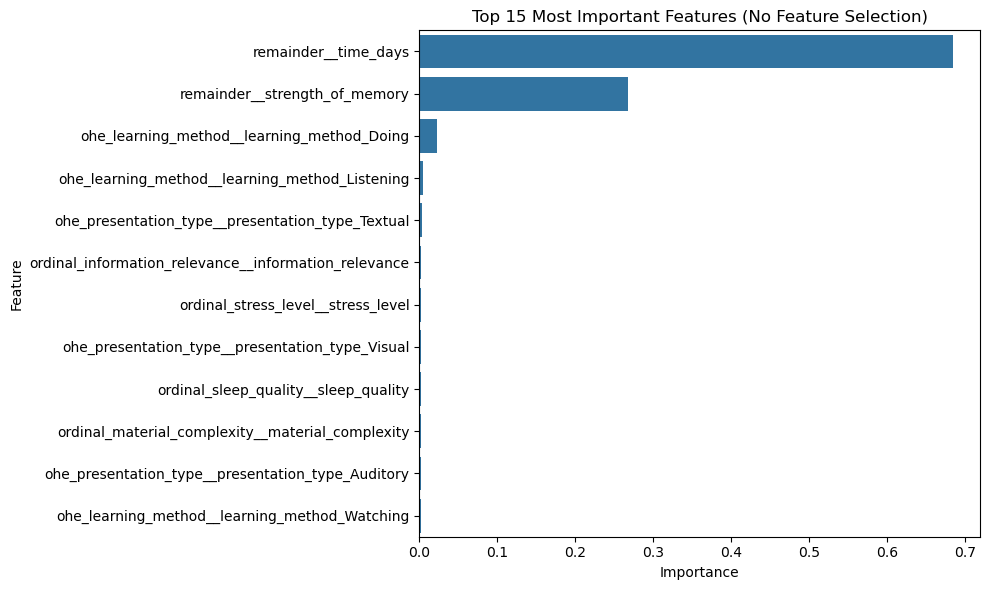

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 Most Important Features (No Feature Selection)")
plt.tight_layout()
plt.show()

In [70]:
import shap

input_data = pd.DataFrame([{
    'time_days': 1.5,
    'strength_of_memory': 2.0,
    'learning_method': 'Doing',
    'material_complexity': 'Medium',
    'information_relevance': 'High',
    'presentation_type': 'Visual',
    'sleep_quality': 'Good',
    'stress_level': 'Moderate'
}])

In [72]:
# --- Extract pipeline steps 
preprocessor = pipe.named_steps['trf1']
scaler = pipe.named_steps['trf2']
regressor = pipe.named_steps['trf4']

# --- Get feature names from preprocessor 
feature_names = preprocessor.get_feature_names_out()
processed_input = scaler.transform(preprocessor.transform(input_data))

# --- Create SHAP explainer with feature names
explainer = shap.Explainer(regressor, feature_names=feature_names)
shap_values = explainer(processed_input)


SHAP Global Feature Importance (Current Input)


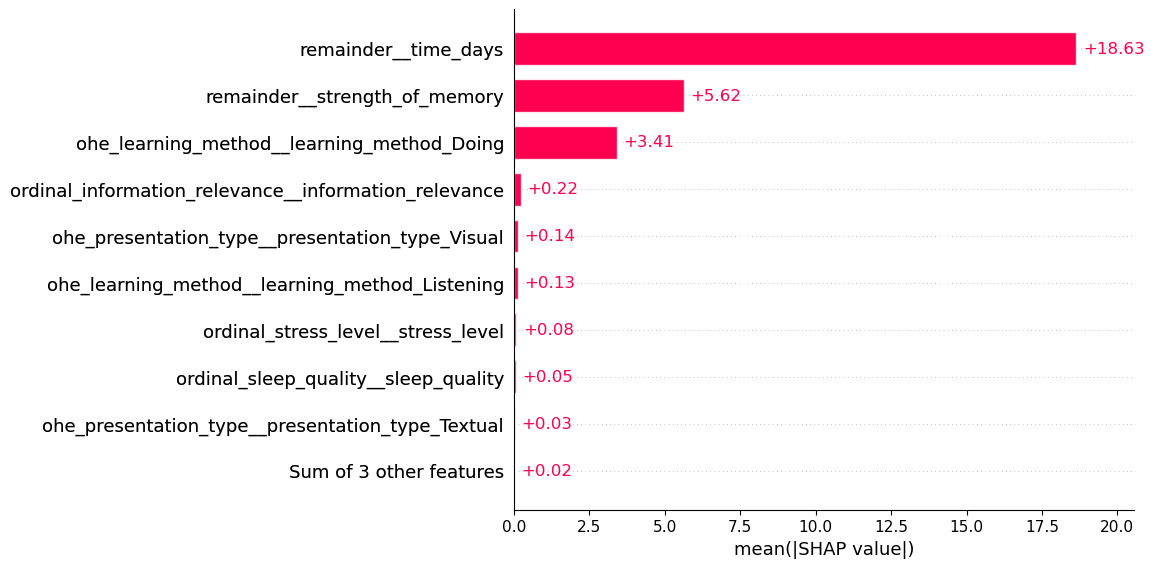

In [73]:
# --- SHAP global importance bar plot
print("\nSHAP Global Feature Importance (Current Input)")
shap.plots.bar(shap_values)